In [1]:
!pip install geopandas

In [1]:
from vega import VegaLite as vte
import pandas as pd
import numpy as np
import geopandas as gpd
import json
from datetime import datetime

In [2]:
cdf = pd.read_csv("crimes.csv").rename(columns={"ID":"count"})
wdf = gpd.read_file("wards.geojson").rename(columns={"ward":"Ward"})

In [3]:
wdf = wdf[wdf["Ward"].notnull()]
wdf['Ward'] = wdf['Ward'].apply(lambda x: int(x)) # Need to make similar to merge
cdfc = cdf[cdf['Ward'].notnull()].copy() # filters out rows with null Wards
cdfc['Ward'] = cdfc['Ward'].apply(lambda x: int(x)) # Need to make similar to merge

# gets rid of reused types
renames = {'CRIM SEXUAL ASSAULT':"CRIMINAL SEXUAL ASSAULT",
 'NON-CRIMINAL (SUBJECT SPECIFIED)': 'NON-CRIMINAL',
 'NON - CRIMINAL': 'NON-CRIMINAL'}
cdfc["Primary Type"] = cdfc["Primary Type"].apply(lambda x: x if (None == renames.get(x)) else renames[x])

In [10]:
ddf = cdfc[['Domestic','Year', 'count', "Primary Type"]].groupby(["Year", "Domestic", "Primary Type"]).count().reset_index()
ddf['Domestic'] = ddf['Domestic'].apply(lambda x: 'true' if bool(x) else 'false' )

with open('viz7_2.json', 'w', encoding='utf-8') as v1:
    v1.write(ddf.to_json(orient='records'))
    

In [100]:
domesticToggle = {
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "data": {"values":[
      {"Domestic":"false","Year":2001,"count":3851},
      {"Domestic":"false","Year":2002,"count":293782},
      {"Domestic":"false","Year":2003,"count":399388},
      {"Domestic":"false","Year":2004,"count":394385},
      {"Domestic":"false","Year":2005,"count":383056},
      {"Domestic":"false","Year":2006,"count":378975},
      {"Domestic":"false","Year":2007,"count":366662},
      {"Domestic":"false","Year":2008,"count":357831},
      {"Domestic":"false","Year":2009,"count":327565},
      {"Domestic":"false","Year":2010,"count":309136},
      {"Domestic":"false","Year":2011,"count":293756},
      {"Domestic":"false","Year":2012,"count":280775},
      {"Domestic":"false","Year":2013,"count":255506},
      {"Domestic":"false","Year":2014,"count":228295},
      {"Domestic":"false","Year":2015,"count":215853},
      {"Domestic":"false","Year":2016,"count":219063},
      {"Domestic":"false","Year":2017,"count":218662},
      {"Domestic":"false","Year":2018,"count":217126},
      {"Domestic":"false","Year":2019,"count":210199},
      {"Domestic":"false","Year":2020,"count":165994},
      {"Domestic":"false","Year":2021,"count":161124},
      {"Domestic":"false","Year":2022,"count":194161},
      {"Domestic":"false","Year":2023,"count":175602},
      {"Domestic":"true","Year":2001,"count":460},
      {"Domestic":"true","Year":2002,"count":59916},
      {"Domestic":"true","Year":2003,"count":76579},
      {"Domestic":"true","Year":2004,"count":75017},
      {"Domestic":"true","Year":2005,"count":70717},
      {"Domestic":"true","Year":2006,"count":69201},
      {"Domestic":"true","Year":2007,"count":70424},
      {"Domestic":"true","Year":2008,"count":69350},
      {"Domestic":"true","Year":2009,"count":65260},
      {"Domestic":"true","Year":2010,"count":61364},
      {"Domestic":"true","Year":2011,"count":58227},
      {"Domestic":"true","Year":2012,"count":55545},
      {"Domestic":"true","Year":2013,"count":52033},
      {"Domestic":"true","Year":2014,"count":47500},
      {"Domestic":"true","Year":2015,"count":48953},
      {"Domestic":"true","Year":2016,"count":50778},
      {"Domestic":"true","Year":2017,"count":50450},
      {"Domestic":"true","Year":2018,"count":51796},
      {"Domestic":"true","Year":2019,"count":51160},
      {"Domestic":"true","Year":2020,"count":46238},
      {"Domestic":"true","Year":2021,"count":47801},
      {"Domestic":"true","Year":2022,"count":44857},
      {"Domestic":"true","Year":2023,"count":38746}
  ]},
  "params": [
    {"name": "toggleDomestic", "bind": {"input": "checkbox"}},
  ],
  "mark": "point",
  "encoding": {
    "x": {"field": "Year", "type": "ordinal"},
    "y": {"field": "count", "type": "quantitative"},
    "color": {
      "condition": {
        "param": "toggleDomestic",
        "field": "Domestic",
        "type": "nominal"
      },
      "value": "gray"
    }
  }
}

vte(domesticToggle)

In [4]:
# pdf = (cdfc.copy()[["Primary Type", "Ward", "Arrest", "count"]]
#     .groupby(["Primary Type", "Ward", "Arrest"])
#     .count()
#     .reset_index()
#     .sort_values(by='count', ascending=False))

topC = (cdfc.copy()[["Ward","Primary Type", 'count']]
        .groupby(["Ward", "Primary Type"])
        .count()
        .sort_values(by=["Ward","count"], ascending=False)
        .reset_index()
        .set_index(["Ward"]))

data = {"Ward":[], "Primary Type":[], "count":[]}
for x in range(1, 51):
    cnt = 1
    for index, row in topC.iterrows():
        if cnt > 5:
            break
        if index == x:
            cnt+=1
            data["Ward"].append(index)
            data["Primary Type"].append(row["Primary Type"])
            data["count"].append(row["count"])
data = pd.DataFrame(data=data)
data
# pdf["Primary Type"] = pdf["Primary Type"].apply(lambda x: x if x in topC else np.nan)
# pdf = pdf[pdf["Primary Type"].notnull()]

,Ward,Primary Type,count
0,1,THEFT,47701
1,1,BATTERY,18083
2,1,CRIMINAL DAMAGE,16918
3,1,BURGLARY,9679
4,1,MOTOR VEHICLE THEFT,7450
...,...,...,...
245,50,THEFT,19382
246,50,BATTERY,11642
247,50,CRIMINAL DAMAGE,11047
248,50,BURGLARY,5510


In [7]:
with open('viz8.json', 'w', encoding='utf-8') as v1:
    v1.write(data.to_json(orient='records'))

In [172]:
data.to_json(orient='records')

'[{"Ward":1,"Primary Type":"THEFT","count":47701},{"Ward":1,"Primary Type":"BATTERY","count":18083},{"Ward":1,"Primary Type":"CRIMINAL DAMAGE","count":16918},{"Ward":1,"Primary Type":"BURGLARY","count":9679},{"Ward":1,"Primary Type":"MOTOR VEHICLE THEFT","count":7450},{"Ward":2,"Primary Type":"THEFT","count":80387},{"Ward":2,"Primary Type":"BATTERY","count":37121},{"Ward":2,"Primary Type":"NARCOTICS","count":23913},{"Ward":2,"Primary Type":"CRIMINAL DAMAGE","count":20515},{"Ward":2,"Primary Type":"DECEPTIVE PRACTICE","count":15931},{"Ward":3,"Primary Type":"BATTERY","count":46470},{"Ward":3,"Primary Type":"THEFT","count":35694},{"Ward":3,"Primary Type":"NARCOTICS","count":27658},{"Ward":3,"Primary Type":"CRIMINAL DAMAGE","count":20502},{"Ward":3,"Primary Type":"ASSAULT","count":16247},{"Ward":4,"Primary Type":"THEFT","count":35771},{"Ward":4,"Primary Type":"BATTERY","count":26698},{"Ward":4,"Primary Type":"CRIMINAL DAMAGE","count":15131},{"Ward":4,"Primary Type":"ASSAULT","count":10685

In [5]:
types = {
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "data": {"url": "viz8.json"},
  "params": [
    {
      "name": "pts",
      "select": {"type": "point", "fields": ["Primary Type"], "toggle": False}
    }
  ],
  "mark": "point",
  "encoding": {
    "x": {"field": "Ward", "type": "ordinal"},
    "y": {"field": "count", "type": "quantitative"},
    "color": {
      "condition": {
        "param": "pts",
        "field": "Arrest",
        "type": "nominal",
        "scale": {"scheme": "yelloworangebrown"}
      },
      "value": "grey"
    },
    "shape": {
      "condition": {
        "param": "pts",
        "field": "Primary Type",
        "type": "nominal",
        "scale": {"range": ["triangle-left", "triangle-right", "triangle-up", "trianlge-down", "square"]}
      },
      "value": "circle"
    },
    "size": {"condition": {"param": "pts", "value": 200}, "value": 50}
  }
}

vte(types)

In [174]:
cdfc.head()#.copy()[["Primary Type", "Year", "Count"]]

,count,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
3,13210088,JG423627,08/31/2023 12:00:00 PM,023XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,...,27,28.0,11,1160870.0,1898642.0,2023,09/16/2023 03:41:56 PM,41.877565,-87.684791,"(41.877565108, -87.68479102)"
4,13210004,JG422532,07/24/2023 09:45:00 PM,073XX S JEFFERY BLVD,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,7,43.0,02,1190812.0,1856743.0,2023,09/16/2023 03:41:56 PM,41.761919,-87.576209,"(41.7619185, -87.576209245)"
5,13210062,JG423596,08/27/2023 07:00:00 AM,034XX N LAWNDALE AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,30,21.0,06,1151117.0,1922554.0,2023,09/16/2023 03:41:56 PM,41.943379,-87.719974,"(41.943378528, -87.7199738)"


In [8]:
df_month = cdfc.copy() # making a new dataframe
df_month['Date'] = df_month["Date"].map(lambda x: datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p")) # here to get datatime obj

In [9]:
spDate = df_month[(df_month["Ward"].notnull())].copy()
spDate['month'] = spDate["Date"].map(lambda x: datetime.strftime(x, '%b'))

In [10]:
df_month = cdfc.copy() # making a new dataframe
df_month['Date'] = df_month["Date"].map(lambda x: datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p")) # here to get datatime obj
spDate = df_month[(df_month["Ward"].notnull())].copy()
spDate['month'] = spDate["Date"].map(lambda x: datetime.strftime(x, '%b'))
spDate = spDate[['count', 'month', "Primary Type", "Year"]].groupby(["Year",'month', 'Primary Type']).count().reset_index()
# # This is here to sort the months in calander order
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
spDate['month'] = pd.Categorical(spDate['month'], categories=months, ordered=True)
spDate = spDate.sort_values(by=["Year", "month"])
spDate

,Year,month,Primary Type,count
63,2001,Jan,ASSAULT,2
64,2001,Jan,BATTERY,2
65,2001,Jan,BURGLARY,2
66,2001,Jan,CRIMINAL SEXUAL ASSAULT,36
67,2001,Jan,CRIMINAL TRESPASS,1
...,...,...,...,...
7425,2023,Oct,ROBBERY,1048
7426,2023,Oct,SEX OFFENSE,97
7427,2023,Oct,STALKING,36
7428,2023,Oct,THEFT,4324


In [7]:
df_month = cdfc.copy() # making a new dataframe
df_month['Date'] = df_month["Date"].map(lambda x: datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p")) # here to get datatime obj
spDate = df_month[(df_month["Ward"].notnull())]
spDate['month'] = spDate["Date"].map(lambda x: datetime.strftime(x, '%b'))
spDate['numMonth'] = spDate["Date"].map(lambda x: datetime.strftime(x, '%m'))
spDate = spDate[['count', 'month','numMonth', "Primary Type", "Year"]].groupby(["Year",'month', "numMonth", 'Primary Type']).count().reset_index()
# # This is here to sort the months in calander order
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
spDate['month'] = pd.Categorical(spDate['month'], categories=months, ordered=True)
spDate = spDate.sort_values(by=["Year", "month"])

spDate

,Year,month,numMonth,Primary Type,count
63,2001,Jan,01,ASSAULT,2
64,2001,Jan,01,BATTERY,2
65,2001,Jan,01,BURGLARY,2
66,2001,Jan,01,CRIMINAL SEXUAL ASSAULT,36
67,2001,Jan,01,CRIMINAL TRESPASS,1
...,...,...,...,...,...
7425,2023,Oct,10,ROBBERY,1048
7426,2023,Oct,10,SEX OFFENSE,97
7427,2023,Oct,10,STALKING,36
7428,2023,Oct,10,THEFT,4324


In [8]:
with open('viz9.json', 'w', encoding='utf-8') as v1:
    v1.write(spDate.to_json(orient='records'))

In [11]:
with open('viz9_2.json', 'w', encoding='utf-8') as v1:
    v1.write(spDate.to_json(orient='records'))

In [25]:
heatDSpec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "width": 800,
  "height": 200,
  "data": {'url': 'viz9.json'},
  "params": [
      {'name':"Filter_By_Year", "value": 2001, "bind": {"input": "range", "min": 2001, "max": 2023, "step": 1}}
  ],
  "mark": "rect",
  "transform": [
      {"filter": {"param": "Filter_By_Year", ""}}
    ],
  "encoding": {
    "y": {"field": "month", "type": "ordinal"},
    "x": {"field": "Primary Type", "type": "ordinal"},
    "color": {"aggregate": "sum","field": "count"},
      'tooltip': [
          {'field':'month', 'type':'nominal'},
          {'field':'Primary Type', "type":'ordinal'},
          {'field':'count','type':"quantitative"}
      ]
  },
#   "config": {
#     "axis": {"grid": True, "tickBand": "extent"}
#   }
}

vte(heatDSpec)

In [12]:
filterTypes = cdfc[["Primary Type", "Ward", "count", "Year"]].groupby(["Year", "Ward", "Primary Type"]).count().reset_index()
filterTypes

,Year,Ward,Primary Type,count
0,2001,1,ASSAULT,2
1,2001,1,CRIMINAL SEXUAL ASSAULT,3
2,2001,1,DECEPTIVE PRACTICE,12
3,2001,1,HOMICIDE,16
4,2001,1,MOTOR VEHICLE THEFT,18
...,...,...,...,...
28360,2023,50,ROBBERY,72
28361,2023,50,SEX OFFENSE,16
28362,2023,50,STALKING,2
28363,2023,50,THEFT,569


In [13]:
with open('viz10.json', 'w', encoding='utf-8') as v1:
    v1.write(filterTypes.to_json(orient='records'))

In [14]:
cdfc["Primary Type"].unique().tolist()

['ASSAULT',
 'CRIMINAL DAMAGE',
 'DECEPTIVE PRACTICE',
 'CRIMINAL SEXUAL ASSAULT',
 'THEFT',
 'OFFENSE INVOLVING CHILDREN',
 'ROBBERY',
 'SEX OFFENSE',
 'OTHER OFFENSE',
 'WEAPONS VIOLATION',
 'BATTERY',
 'STALKING',
 'MOTOR VEHICLE THEFT',
 'CRIMINAL TRESPASS',
 'HOMICIDE',
 'PROSTITUTION',
 'BURGLARY',
 'NARCOTICS',
 'KIDNAPPING',
 'ARSON',
 'CONCEALED CARRY LICENSE VIOLATION',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'PUBLIC PEACE VIOLATION',
 'LIQUOR LAW VIOLATION',
 'INTIMIDATION',
 'GAMBLING',
 'OBSCENITY',
 'HUMAN TRAFFICKING',
 'OTHER NARCOTIC VIOLATION',
 'PUBLIC INDECENCY',
 'RITUALISM',
 'NON-CRIMINAL']

In [22]:
wgeo = wdf[["Ward", "geometry"]]
geoCrime = cdfc[['Ward', 'count', "Year"]].groupby(["Year", 'Ward']).count().reset_index()
gc = geoCrime.merge(wgeo, on='Ward', how='inner')

,Year,Ward,count,geometry
0,2001,1,78,"MULTIPOLYGON (((-87.67818 41.92863, -87.67817 ..."
1,2002,1,8321,"MULTIPOLYGON (((-87.67818 41.92863, -87.67817 ..."
2,2003,1,10358,"MULTIPOLYGON (((-87.67818 41.92863, -87.67817 ..."
3,2004,1,9595,"MULTIPOLYGON (((-87.67818 41.92863, -87.67817 ..."
4,2005,1,8683,"MULTIPOLYGON (((-87.67818 41.92863, -87.67817 ..."
...,...,...,...,...
1145,2019,50,2640,"MULTIPOLYGON (((-87.69018 42.01929, -87.69018 ..."
1146,2020,50,2369,"MULTIPOLYGON (((-87.69018 42.01929, -87.69018 ..."
1147,2021,50,2294,"MULTIPOLYGON (((-87.69018 42.01929, -87.69018 ..."
1148,2022,50,3056,"MULTIPOLYGON (((-87.69018 42.01929, -87.69018 ..."


In [23]:
with open('viz11.json', 'w', encoding='utf-8') as v1:
    v1.write(filterTypes.to_json(orient='records'))

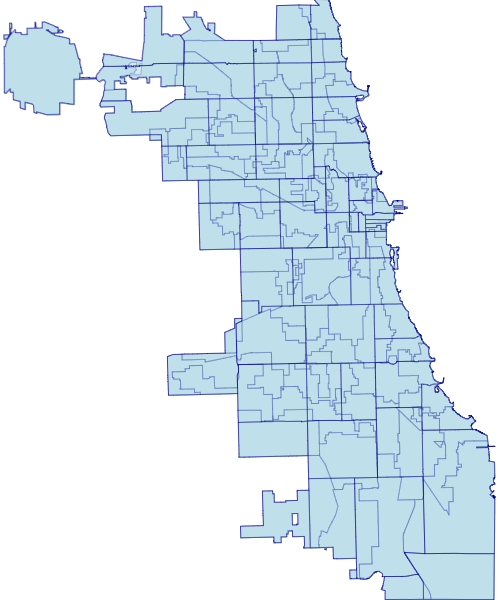

In [30]:
mapC = {"$schema": "https://vega.github.io/schema/vega/v3.0.json",
  "width": 500,
  "height": 600,
  "autosize": "none",
  "signals": [
    {
      "name": "translate0",
      "update": "width / 2"
    },
    {
      "name": "translate1",
      "update": "height / 2"
    }
  ],
  "projections": [
    {
      "name": "projection",
      "size": {"signal": "[width, height]"},
      "fit": {"signal": "data('netherlands')"}
    }
  ],
  "data": [
    {
      "name": "netherlands",
      "url": "wards.geojson",
      "format": {
        "type": "json",
        "property": "features"
      }
    }
  ],
  "marks": [
    {
      "type": "shape",
      "from": {
        "data": "netherlands"
      },
      "encode": {
        "update": {
          "strokeWidth": {
            "value": 0.5
          },
          "stroke": { 
            "value": "darkblue"
          },
          "fill": {
            "value": "lightblue"
          },
          "fillOpacity": {
            "value": 0.5
          }
        },
        "hover": {
          "fill": {
            "value": "#66C2A5"
          },
          "strokeWidth": {
            "value": 2
          },
          "stroke": {
            "value": "#FC8D62"
          }
        }
      },
      "transform": [
        {
          "type": "geoshape",
          "projection": "projection"
        }
      ]
    }
  ]
}
vte(mapC)

In [17]:
allC = cdfc["Primary Type"].unique().tolist()
allC.sort()
allC

['ARSON',
 'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CONCEALED CARRY LICENSE VIOLATION',
 'CRIMINAL DAMAGE',
 'CRIMINAL SEXUAL ASSAULT',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'INTIMIDATION',
 'KIDNAPPING',
 'LIQUOR LAW VIOLATION',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'NON-CRIMINAL',
 'OBSCENITY',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER NARCOTIC VIOLATION',
 'OTHER OFFENSE',
 'PROSTITUTION',
 'PUBLIC INDECENCY',
 'PUBLIC PEACE VIOLATION',
 'RITUALISM',
 'ROBBERY',
 'SEX OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS VIOLATION']

In [5]:
total_crimes = cdfc.copy()[['Ward', 'count']].groupby(['Ward']).count()
tc_w = total_crimes.merge(wdf, on='Ward', how='inner')
tc_w['crimes_in_Thsnd'] = (tc_w['count'] / 1000).round(0).astype(int)

tc_w = tc_w[["Ward", 'crimes_in_Thsnd']]

In [6]:
tc_y = cdfc.copy()[['count', 'Year']]
# tc_y = tc_y[tc_y['Year']>2018]
tc_y = tc_y.groupby(["Year"]).count().reset_index()


In [14]:
with open('viz1.json', 'w', encoding='utf-8') as v1:
    v1.write(tc_y.to_json(orient='records'))
    
print(tc_y.to_json(orient='records'))

[{"Year":2001,"count":4311},{"Year":2002,"count":353698},{"Year":2003,"count":475967},{"Year":2004,"count":469402},{"Year":2005,"count":453773},{"Year":2006,"count":448176},{"Year":2007,"count":437086},{"Year":2008,"count":427181},{"Year":2009,"count":392825},{"Year":2010,"count":370500},{"Year":2011,"count":351983},{"Year":2012,"count":336320},{"Year":2013,"count":307539},{"Year":2014,"count":275795},{"Year":2015,"count":264806},{"Year":2016,"count":269841},{"Year":2017,"count":269112},{"Year":2018,"count":268922},{"Year":2019,"count":261359},{"Year":2020,"count":212232},{"Year":2021,"count":208925},{"Year":2022,"count":239018},{"Year":2023,"count":214348}]


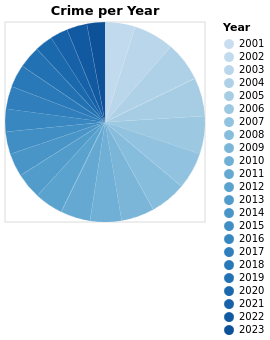

In [17]:
pieSpec = {
    'title':'Crime per Year',
  "data": {
    'url': 'viz1.json'
  },
  "mark": "arc",
  "encoding": {
    "theta": {"field": "count", "type": "quantitative"},
    "color": {"field": "Year", "type": "ordinal"},
      "tooltip": [
          {"field":"Year",'type':'ordinal'},
          {'field':"count",'type':'quantitative'}
      ]
  }
}

vte(pieSpec)

In [4]:
total_arrests_T = cdfc.copy()[['Arrest', 'count', 'Primary Type']] # This is a total arrests made dataframe
# total_arrests_T = 
ta = total_arrests_T[total_arrests_T['Arrest']].groupby(['Primary Type']).count().drop(['Arrest'], axis=1).reset_index()
ta['count'] = ta['count'].apply(lambda x: x/10000)
ta = ta.sort_values(by='count', ascending=False)[:20]

In [5]:
with open('viz2.json', 'w', encoding='utf-8') as v1:
    v1.write(ta.to_json(orient='records'))

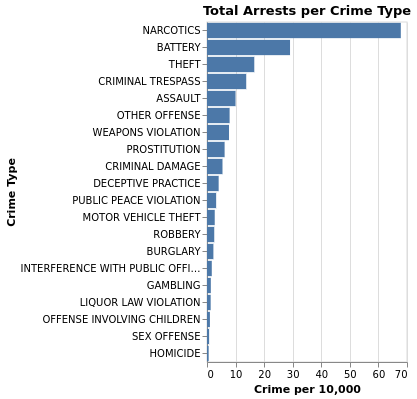

In [6]:
sortBarSpec = {
    'title':"Total Arrests per Crime Type",
  "data": {'url': 'viz2.json'},
  "height": {"step": 17},
  "mark": "bar",
  "encoding": {
    "y": {
      "field": "Primary Type",
      "type": "ordinal",
      "sort": "-x",
        'title': "Crime Type"
    },
    "x": {
      "aggregate": "sum",
      "field": "count",
      "title": "Crime per 10,000"
    },
      'tooltip':[
      {"field": "count", "type": "quantitative"},
    ]
  },
    
}

vte(sortBarSpec)

In [22]:
with open('viz3.json', 'w', encoding='utf-8') as v1:
    v1.write(tc_w.to_json(orient='records'))

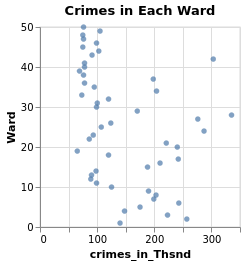

In [23]:
sphereSpec = {
    "title":"Crimes in Each Ward",
  "data": {
    'url':'viz3.json'
  },
   "mark": "circle",
  "encoding": {
    "x": {"field": "crimes_in_Thsnd", "type": "quantitative"},
    "y": {"field": "Ward", "type": "quantitative"},
      "tooltip": [
      {"field": "crimes_in_Thsnd", "type": "quantitative"},
      {"field": "Ward", "type": "quantitative"}
    ]
  }
}

vte(sphereSpec)

In [7]:
df_month = cdfc.copy() # making a new dataframe
df_month['Date'] = df_month["Date"].map(lambda x: datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p")) # here to get datatime obj

In [8]:
# This is here to make the new dataframe 
spDate = df_month[(df_month["Year"]==2022) & (df_month["Ward"].notnull())].copy()
spDate['month'] = spDate["Date"].map(lambda x: datetime.strftime(x, '%b'))
spDate = spDate[['count', 'month']].groupby('month').count().reset_index()

# This is here to sort the months in calander order
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
spDate['month'] = pd.Categorical(spDate['month'], categories=months, ordered=True)
spDate = spDate.sort_values(by=["month"])


In [26]:
with open('viz4.json', 'w', encoding='utf-8') as v1:
    v1.write(spDate.to_json(orient='records'))

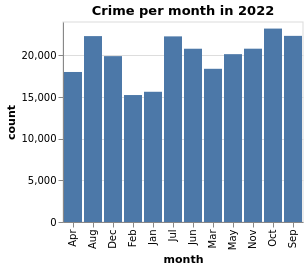

In [27]:
barSpec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "title": "Crime per month in 2022",
    "description": "A barchart with month and count data.",
    "data": {"url":"viz4.json"},
    "mark": "bar",
    "encoding": {
        "x": {"field": "month", "type": "ordinal"},
        "y": {"field": "count", "type": "quantitative"},
        'tooltip': [
            {'field':'count','type':'quantitative'}
        ]
    }
}
vte(barSpec)

In [9]:
df_heat = df_month[df_month["Ward"].notnull()].copy() # Makes a new dataframe 

# just gets a month from datetime obj to use 
df_heat["month"] = df_heat['Date'].map(lambda x: datetime.strftime(x, '%b'))
df_heat = df_heat[['count', 'month', 'Primary Type']].groupby(['month', 'Primary Type']).count().reset_index()

In [10]:
with open('viz5.json', 'w', encoding='utf-8') as v1:
    v1.write(df_heat.to_json(orient='records'))

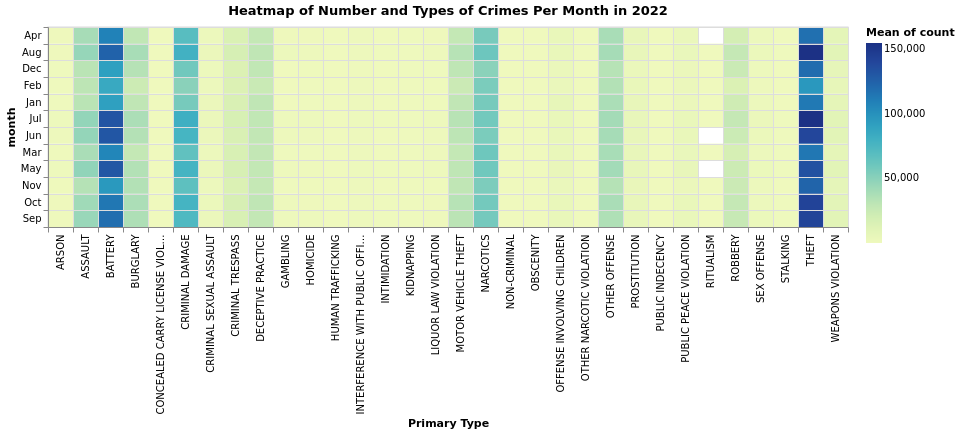

In [12]:
heatSpec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "width": 800,
  "height": 200,
  "title": "Heatmap of Number and Types of Crimes Per Month in 2022",
  "description": "A heatmap showing crimes per month in 2022 based on type of crime.",
  "data": {'url': 'viz5.json'},
  "mark": "rect",
  "encoding": {
    "y": {"field": "month", "type": "nominal"},
    "x": {"field": "Primary Type", "type": "ordinal"},
    "color": {"aggregate": "mean","field": "count"},
      'tooltip': [
          {'field':'month', 'type':'nominal'},
          {'field':'Primary Type', "type":'ordinal'},
          {'field':'count','type':"quantitative"}
      ]
  },
  "config": {
    "axis": {"grid": True, "tickBand": "extent"}
  }
}

vte(heatSpec)

In [31]:
line_df = cdfc.copy()[['Year', 'count', 'Primary Type']]

In [32]:
# These are just filtering functions to be used later
thft = line_df["Primary Type"]=="THEFT"
bat = line_df["Primary Type"]=="BATTERY"
ast = line_df["Primary Type"]=="ASSAULT"
crd = line_df["Primary Type"]=="CRIMINAL DAMAGE"

# Filters out the df and pivots the table to be used in the fig
line_dfcp = line_df[thft | bat | ast | crd ].copy()
line_dfcp = line_dfcp.groupby(["Primary Type", "Year"]).count().reset_index()

# line_dfcp = line_dfcp.pivot(index="Year", columns=['Primary Type'], values="count")

In [35]:
with open('viz6.json', 'w', encoding='utf-8') as v1:
    v1.write(line_dfcp.to_json(orient='records'))

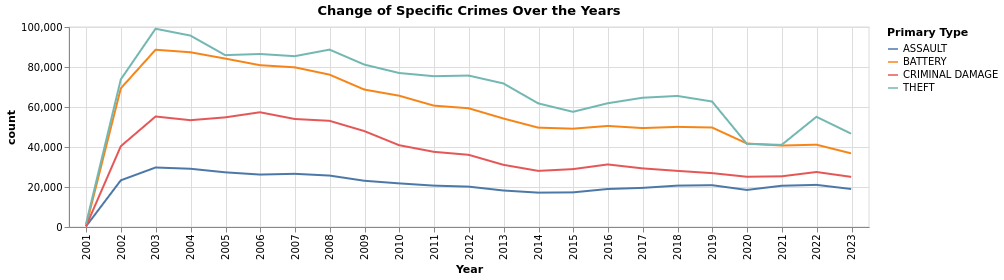

In [24]:
lineSpec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "width": 800,
    "height": 200,
    "title": "Change of Specific Crimes Over the Years",
    "description": "A line graph showing the change of crimes as time goes.",
    "data": {'url': 'viz6.json'},
    "mark": "line",
    "encoding": {
        "y": {"field": "count", "type": "quantitative"},
        "x": {"field": "Year", "type": "nominal"},
        "color": {"field": "Primary Type", "type": "nominal"},
        'tooltip': [
          {'field':'Year', 'type':'nominal'},
          {'field':'Primary Type', "type":'ordinal'},
          {'field':'count','type':"quantitative"}
      ]
    },
    "config": {
        "axis": {"grid": True}
    }
}

vte(lineSpec)